# Bio-Inpired Sensing Movement
---
## Final Project - Odor Identity Controls Robot Movements
---
### Alon Mizrahi and Itamar Mishani

Importing packages:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None  # default='warn'
import time
from itertools import cycle

# Scikit-learn plots:
from sklearn.model_selection import train_test_split, learning_curve, KFold, ShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

# pandas configuration
pd.set_option('display.max_columns', 999)

Reading data files:

In [2]:
data = pd.read_csv('./data/3_odors_bio_inspired_project.csv')
test = pd.read_excel('./data/Test_odors_and_control.xlsx')

#### Data exploration and preprocess:

In [3]:
train = data.iloc[:, :-4]
labels = data['label']
labels

0      4-Rose
1      4-Rose
2      4-Rose
3      4-Rose
4      4-Rose
        ...  
356    1-Benz
357    1-Benz
358    1-Benz
359    1-Benz
360    1-Benz
Name: label, Length: 361, dtype: object

### Scaling:

In [4]:
for index, row in train.iterrows():
    scaler = MinMaxScaler()
    scaler.fit(train.iloc[index,:].values.reshape(-1, 1))
    train.iloc[index,:] = scaler.transform(train.iloc[index,:].values.reshape(-1, 1)).reshape(1,-1)

In [5]:
# sns.set_style('white')
# for i in range(train.shape[0]):
#     plt.plot(train.iloc[i,:])
#     plt.tick_params(
#         axis='x',          
#         which='both',      
#         bottom=False,      
#         top=False,         
#         labelbottom=False) 
#     plt.xlim(0, train.shape[1])
#     plt.title(f'Data point: {i} Label: {labels[i]}', fontsize=16)
#     filename= 'togif\Volcano_step'+str(i)+'.png'
#     plt.savefig(filename, dpi=96)
#     plt.gca()
#     plt.close()

In [6]:
# import glob
# from PIL import Image
 
# # Create the frames
# frames = []
# imgs = glob.glob("togif\*.png")
# for i in imgs:
#     new_frame = Image.open(i)
#     frames.append(new_frame)

#Save into a GIF file that loops forever

# frames[0].save('png_to_gif.gif', format='GIF',
#                append_images=frames[1:],
#                save_all=True,
#                duration=300, loop=0)

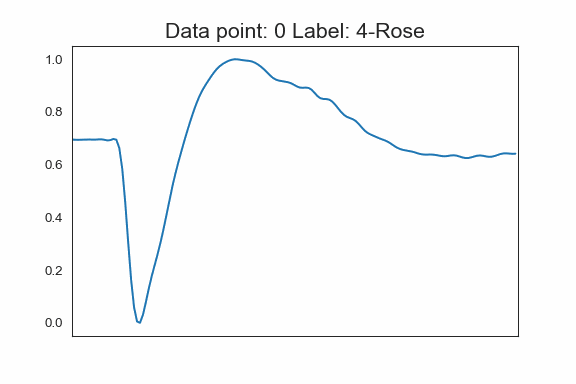

In [7]:
train

t0        t1        t2        t3        t4        t5        t6  \
0    0.695099  0.694518  0.694297  0.694657  0.695378  0.695738  0.695494   
1    0.679059  0.679423  0.679605  0.679540  0.679566  0.679969  0.680632   
2    0.667398  0.667455  0.667398  0.667197  0.667011  0.667197  0.668100   
3    0.618281  0.619193  0.619471  0.619034  0.618677  0.619431  0.620740   
4    0.609366  0.611563  0.612731  0.612498  0.611236  0.610161  0.610161   
..        ...       ...       ...       ...       ...       ...       ...   
356  0.595104  0.591162  0.589114  0.590123  0.593729  0.597763  0.599749   
357  0.622123  0.618815  0.618181  0.619584  0.622123  0.624929  0.627201   
358  0.545254  0.543265  0.544464  0.547400  0.550084  0.551504  0.552136   
359  0.707869  0.710065  0.713345  0.717280  0.721359  0.725266  0.728261   
360  0.701064  0.704333  0.709385  0.713275  0.714220  0.713059  0.712113   

           t7        t8        t9       t10       t11       t12       t13  \
0    0.695006  0.695134  0.695936  0.696075  0.694309  0.692065  0.693158   
1    0.681140  0.681361  0.681205  0.679800  0.676302  0.673012  0.675678   
2    0.669648  0.671483  0.671870  0.669204  0.664488  0.663184  0.669691   
3    0.621335  0.619510  0.615305  0.611298  0.610703  0.615028  0.620978   
4    0.611563  0.613339  0.614133  0.613339  0.611656  0.611563  0.613666   
..        ...       ...       ...       ...       ...       ...       ...   
356  0.599016  0.597152  0.595165  0.592201  0.589817  0.593271  0.605159   
357  0.629406  0.631878  0.633014  0.629472  0.623158  0.624929  0.642836   
358  0.554409  0.559302  0.565016  0.568867  0.573034  0.583515  0.597026   
359  0.729715  0.727975  0.722328  0.717252  0.722614  0.740809  0.749080   
360  0.712734  0.712059  0.706818  0.701632  0.709520  0.734589  0.749662   

          t14       t15       t16       t17       t18       t19       t20  \
0    0.697691  0.694773  0.663149  0.584210  0.457549  0.305784  0.163143   
1    0.685080  0.685288  0.644405  0.536306  0.369119  0.190307  0.057788   
2    0.676700  0.660503  0.593682  0.468252  0.308953  0.160446  0.058322   
3    0.622406  0.613599  0.593645  0.565359  0.531400  0.490142  0.438608   
4    0.615489  0.611703  0.598289  0.573098  0.536315  0.488830  0.433726   
..        ...       ...       ...       ...       ...       ...       ...   
356  0.614235  0.597641  0.537437  0.438360  0.323605  0.214779  0.119430   
357  0.660976  0.634617  0.523302  0.336919  0.145224  0.025758  0.000000   
358  0.590018  0.525997  0.388989  0.211731  0.063548  0.000000  0.018373   
359  0.701937  0.564413  0.353564  0.142686  0.013461  0.000000  0.073667   
360  0.700794  0.550111  0.323653  0.110136  0.000000  0.019558  0.121481   

          t21       t22       t23       t24       t25       t26       t27  \
0    0.058495  0.005044  0.000000  0.030346  0.079009  0.131054  0.178427   
1    0.000000  0.002185  0.027711  0.050155  0.065824  0.083795  0.110894   
2    0.010105  0.000000  0.007496  0.021227  0.039789  0.065918  0.102153   
3    0.376760  0.309517  0.243702  0.182886  0.126433  0.075059  0.033483   
4    0.374463  0.314171  0.254019  0.192466  0.130445  0.074126  0.031454   
..        ...       ...       ...       ...       ...       ...       ...   
356  0.042815  0.000000  0.004706  0.046146  0.089023  0.103508  0.094340   
357  0.025791  0.049845  0.058798  0.074232  0.108977  0.143554  0.151371   
358  0.065095  0.087350  0.079143  0.075544  0.108754  0.175806  0.249866   
359  0.176625  0.265864  0.330149  0.377891  0.418732  0.456607  0.492029   
360  0.232941  0.309795  0.351829  0.380464  0.412502  0.451672  0.494894   

          t28       t29       t30       t31       t32       t33       t34  \
0    0.220813  0.262305  0.307307  0.357585  0.412024  0.467335  0.519729   
1    0.147707  0.193038  0.246743  0.307677  0.371863  0.434488  0.492601   
2    0.149051  0.204220  0.262685  0.319100  0.371359  0.421726  0.474043   
3  

Number of unique labels:

In [8]:
labels.nunique()

3

### Tranforming each label from string to integer:

In [9]:
lab = []
for elem in labels:
    if elem == '4-Rose':
        lab.append(0)
    elif elem == '1-Benz':
        lab.append(1)
    elif elem == '6-Ger':
        lab.append(2)
    else:
        lab.append(None)
labels = pd.DataFrame(lab, columns=['Label'])


In [10]:
labels.head()

Label
0      0
1      0
2      0
3      0
4      0

In [11]:
y = labels.Label.values
X = train.values

X.shape, y.shape

((361, 151), (361,))

In [12]:
models_running_time = []

### There are many options for score matrics we can use. In our case, we used ROC AUC OVR metric (Reciever Operating Charactaristic, Area Under Curve, One vs Rest repectively) 

In [13]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## We now use gridsearch in order to find the best hyperparameters for all evaluated calssification models:
---

### K-Nearest Neighbors:

In [14]:
start = time.time()
KNN_options = {'n_neighbors' : [10, 50, 100],
          'weights' : [ 'uniform', 'distance']
              }
# Setup classifier, and find using GridsearchCV the best hyper-parameters
kf = KFold(n_splits=5, shuffle = True, random_state=100)
KNN_best = GridSearchCV(KNeighborsClassifier() ,KNN_options, cv=kf, scoring='roc_auc_ovr_weighted', n_jobs=-1)
KNN_best.fit(X, y) #X_train, y_train

print ('KNN chosen parameters (recieved best AUC): {}'.format(KNN_best.best_params_))
print ("KNN AUC score with the chosen parameters: ", KNN_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (round(total_time, 2)))
models_running_time.append(total_time)

KNN chosen parameters (recieved best AUC): {'n_neighbors': 10, 'weights': 'distance'}
KNN AUC score with the chosen parameters:  0.9870097860782712
Running time: 0.08 minutes


In [15]:
neigh = KNeighborsClassifier(**KNN_best.best_params_)

### Gaussian Naive Bayes:

In [16]:
start = time.time()
GNB_options = {'priors' : [None],
               'var_smoothing' : [ 1e-9, 1e-7, 1e-5, 1e-3, 0.1, 1, 10]
              }

# Setup classifier, and find using GridsearchCV the best hyper-parameters
skf = KFold(n_splits=5, shuffle = True, random_state=100)
GNB_best = GridSearchCV(GaussianNB(), GNB_options, cv=skf, scoring='roc_auc_ovr_weighted', n_jobs=-1)
GNB_best.fit(X, y)

print ('GNB chosen parameters (recieved best AUC): {}'.format(GNB_best.best_params_))
print ("GNB AUC score with the chosen parameters: ", GNB_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (round(total_time,2)))
models_running_time.append(total_time)

GNB chosen parameters (recieved best AUC): {'priors': None, 'var_smoothing': 0.1}
GNB AUC score with the chosen parameters:  0.9495980810563289
Running time: 0.0 minutes


In [17]:
GNB = GaussianNB(**GNB_best.best_params_)

### Logistic Regression:

In [18]:
start = time.time()
LogisticRegression_options = {'penalty' : ['l1', 'l2'],
                              'C' : [ 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                              'tol' : [ 0.001, 1e-5 ],
                              'max_iter' : [100, 2000],
                              'solver' : ["liblinear"]}

kf = KFold(n_splits = 5, shuffle = True, random_state=100)
LR_best = GridSearchCV(LogisticRegression(), LogisticRegression_options, cv=kf, scoring = 'roc_auc_ovr_weighted', n_jobs = -1 )
LR_best.fit(X, y) #X_train, y_train

print ("Logistic Regresion best parameters: {}".format(LR_best.best_params_))
print ("Logistic Regresion AUC score with the chosen parameters: ", LR_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (round(total_time,2)))
models_running_time.append(total_time)

Logistic Regresion best parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}
Logistic Regresion AUC score with the chosen parameters:  0.9836368863151856
Running time: 2.42 minutes


In [19]:
LR = LogisticRegression(**LR_best.best_params_)

### Support Vector Classification:

In [20]:
start = time.time()
parametersOptions = {'C':[1.,0.1],
                     'kernel': ['poly','rbf'],
                     'tol' : [1e-3, 1e-5],
                     'degree' : [1, 3, 5],
                     'probability': [True]
                    }

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
SVC_best = GridSearchCV(SVC(), parametersOptions, cv = kfold, scoring='roc_auc_ovr_weighted',n_jobs = -1)
SVC_best.fit(X, y) #X_train, y_train
print ('SVC chosen parameters (recieved best AUC): {}'.format(SVC_best.best_params_))
print ("SVC AUC score with the chosen parameters: ", SVC_best.best_score_)

total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
models_running_time.append(total_time)

SVC chosen parameters (recieved best AUC): {'C': 0.1, 'degree': 5, 'kernel': 'poly', 'probability': True, 'tol': 1e-05}
SVC AUC score with the chosen parameters:  0.9915082219023091
Running time: 0.05128664175669352 minutes


In [21]:
svc = SVC(**SVC_best.best_params_)

### Adaboost:

In [22]:
start = time.time()
parametersOptions = {'n_estimators':[500,1000],
                     'learning_rate': [0.01,0.1,0.3],
                    'random_state' :[100]}

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
ADB_best = GridSearchCV(AdaBoostClassifier(), parametersOptions, cv = kfold, scoring='roc_auc_ovr_weighted',n_jobs = -1)
ADB_best.fit(X, y)
print ('Adaptive Boosting chosen parameters (recieved best AUC): {}'.format(ADB_best.best_params_))
print ("Adaptive Boosting AUC score with the chosen parameters: ", ADB_best.best_score_)


total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
models_running_time.append(total_time)

Adaptive Boosting chosen parameters (recieved best AUC): {'learning_rate': 0.3, 'n_estimators': 1000, 'random_state': 100}
Adaptive Boosting AUC score with the chosen parameters:  0.9440826270561418
Running time: 0.8413517435391744 minutes


In [23]:
ADB = AdaBoostClassifier(**ADB_best.best_params_)

### Random Forest:

In [24]:
# RFC algorithm
start = time.time()
parametersOptions = {'n_estimators':[200, 500, 1000],
                     'max_features': ['auto', 'sqrt', 'log2'],
                     'max_depth' : [4,5,6,7,8],
                     'criterion' :['gini', 'entropy']}

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
RFC_best = GridSearchCV(RandomForestClassifier(), parametersOptions, cv = kfold, scoring='roc_auc_ovr',n_jobs = -1)
RFC_best.fit(X, y)
print ('RFC chosen parameters (recieved best AUC): {}'.format(RFC_best.best_params_))
print ("RFC AUC score with the chosen parameters: ", RFC_best.best_score_)
print ("RFC KFold parameters: ", kfold)

total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
models_running_time.append(total_time)

RFC chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 1000}
RFC AUC score with the chosen parameters:  0.987644935492396
RFC KFold parameters:  KFold(n_splits=5, random_state=100, shuffle=True)
Running time: 3.0791301409403484 minutes


In [25]:
RFC = RandomForestClassifier(**RFC_best.best_params_)
RFC

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=1000)

### For each Fold we will evaluate and plot both confusion matrices and ROC curves:

In [26]:
y = label_binarize(y, classes=[0, 1, 2])
y.shape

(361, 3)

In [27]:
n_classes = y.shape[1]

n_samples, n_features = X.shape

In [28]:
def KfoldProcess(X, y, clf, k):
    """
    This function trains the model using the k-folds
    X - X_train, the data to train the model
    y - Y_train, the target data
    clf - The classifier to train
    k - Number of folds to process
    """
    
    # Set KFolds with a random state for consistent results
    kf = KFold(n_splits = k, shuffle = True, random_state=100)
    
    # we catch the tpr and fpr since we need to interpolate data
    # Validation set:
    cm = 0
    tpr_test, fpr_test, auc_test = [],[],[]
    for train_index, test_index in kf.split(X):
        #Splitting into train and validation, based on the current fold.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Learn to predict each class against the other
        classifier = OneVsRestClassifier(
            clf
        )
        trained = classifier.fit(X_train, y_train)#.decision_function(X_test)
        y_score = trained.predict_proba(X_test)
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        auc_test.append(roc_auc)
        tpr_test.append(tpr)
        fpr_test.append(fpr)
        
        # plot confusion matrix for current fold
        sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_score.argmax(axis=1)), annot=True, cmap='Blues')
        plt.title("Confusion Matrix for fold #%s"%(cm+1))
        plt.show()
        cm+=1
    plt.show()
    return [tpr_test, fpr_test, auc_test]

In [29]:
def plot_Kfold(tpr, fpr, roc_auc, fold, n_classes=n_classes):
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Fold {fold}")
    plt.legend(loc="lower right")
    plt.show()

## K-Nearest Neighbors:
---

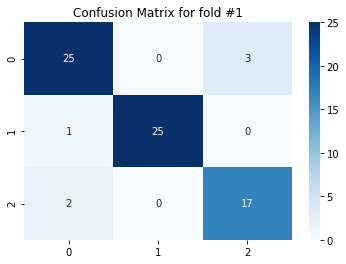

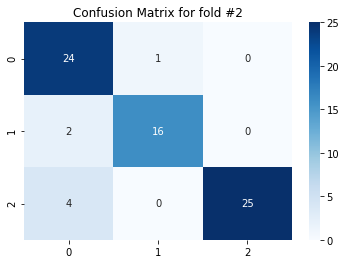

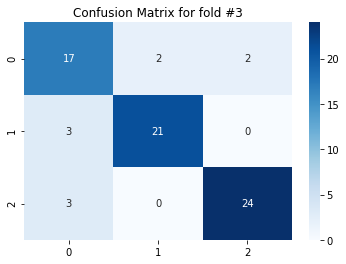

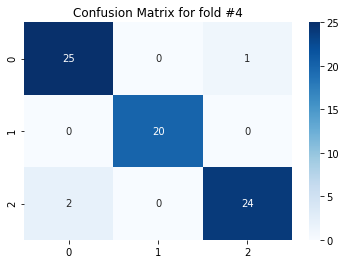

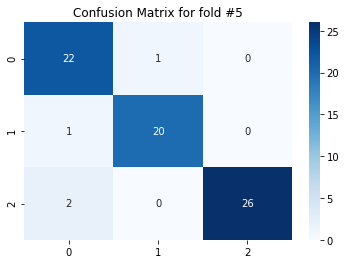

In [30]:
parameters = KfoldProcess(X, y, neigh, 5)

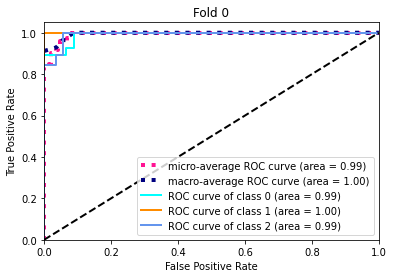

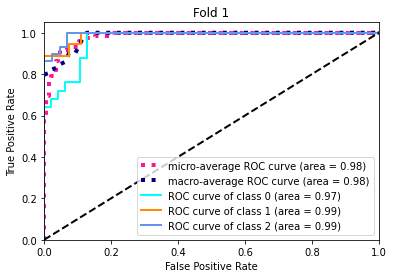

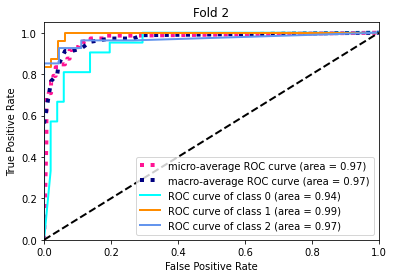

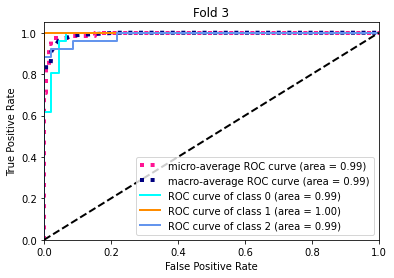

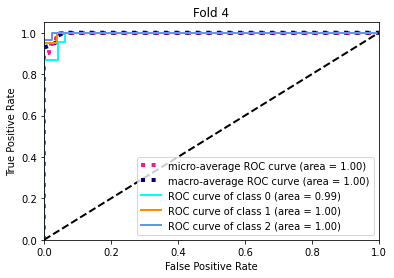

In [31]:
for i in range(len(parameters[0])):
    plot_Kfold(parameters[0][i], parameters[1][i], parameters[2][i], fold=i)

## Gaussian Naive Bayes:
---

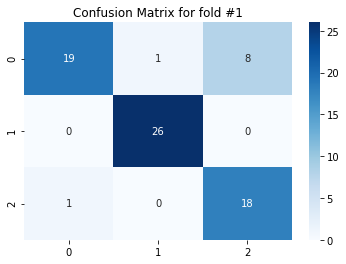

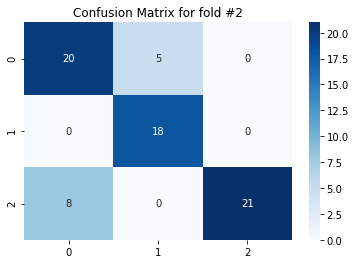

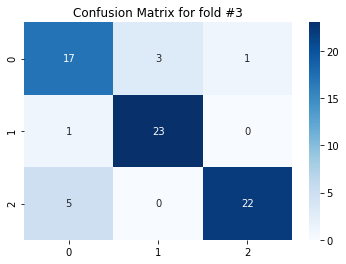

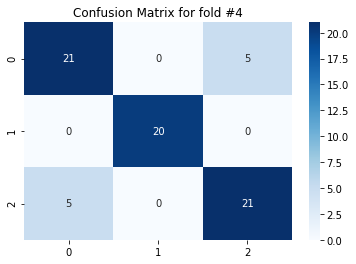

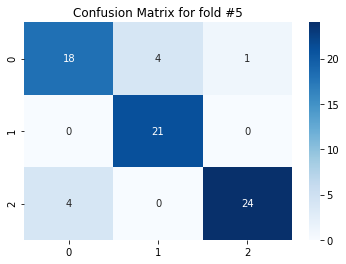

In [32]:
parameters = KfoldProcess(X, y, GNB, 5)

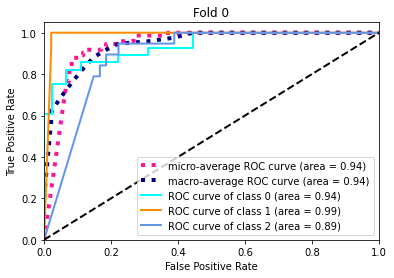

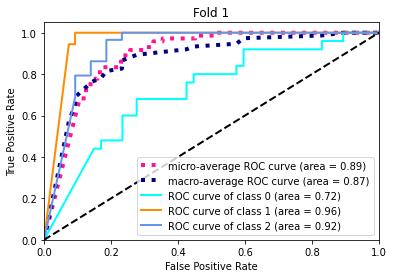

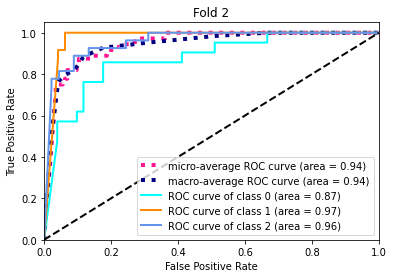

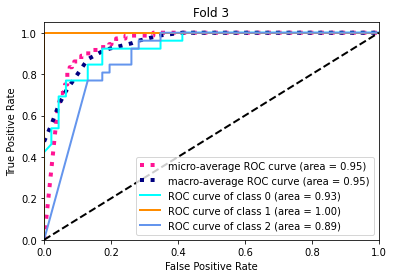

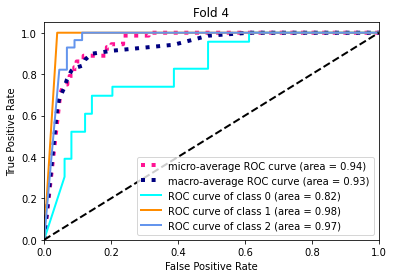

In [33]:
for i in range(len(parameters[0])):
    plot_Kfold(parameters[0][i], parameters[1][i], parameters[2][i], fold=i)

## Logistic Regression:
---

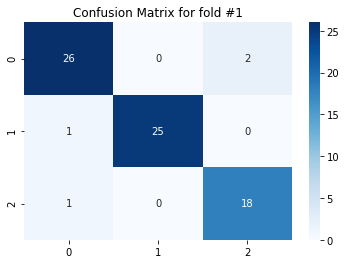

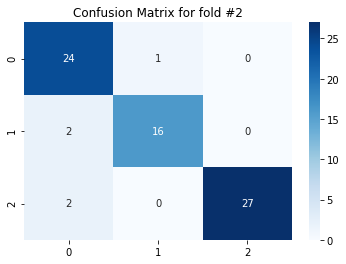

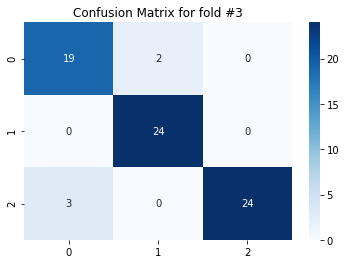

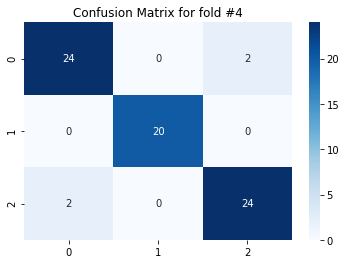

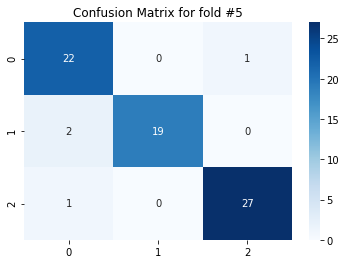

In [34]:
parameters = KfoldProcess(X, y, LR, 5)

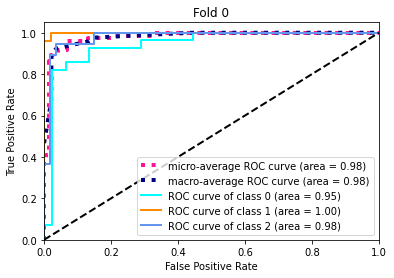

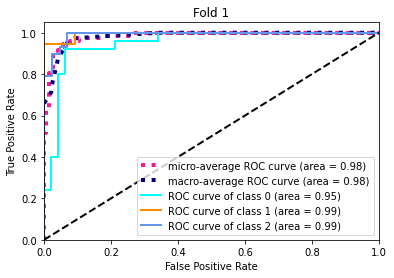

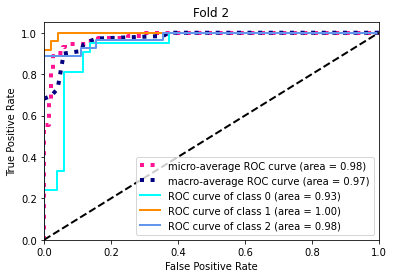

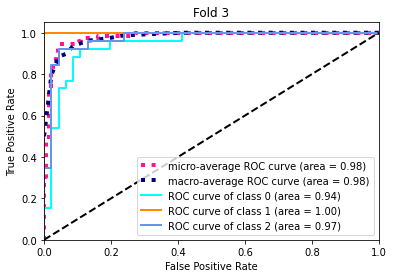

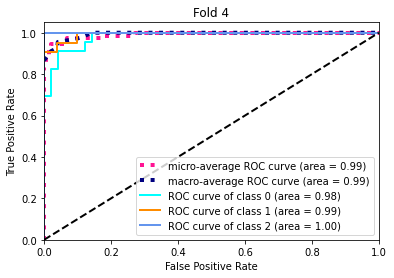

In [35]:
for i in range(len(parameters[0])):
    plot_Kfold(parameters[0][i], parameters[1][i], parameters[2][i], fold=i)

## SVC:
---

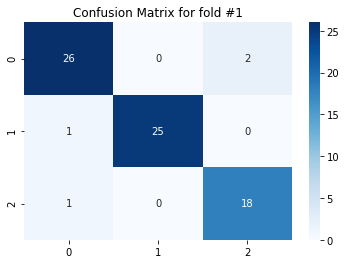

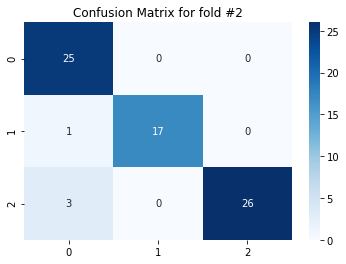

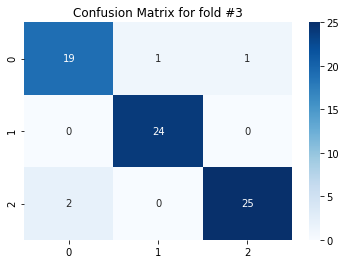

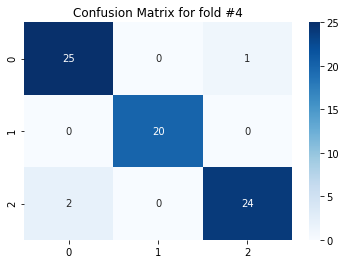

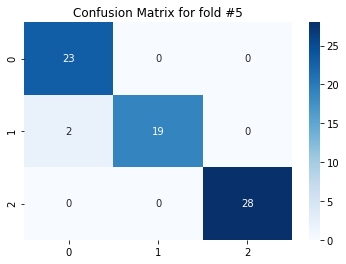

In [36]:
parameters = KfoldProcess(X, y, svc, 5)

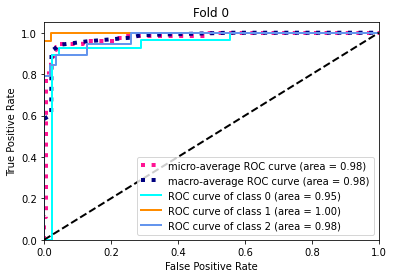

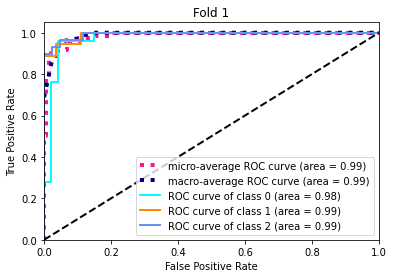

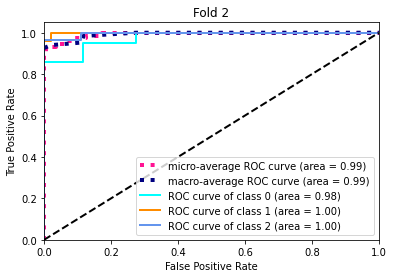

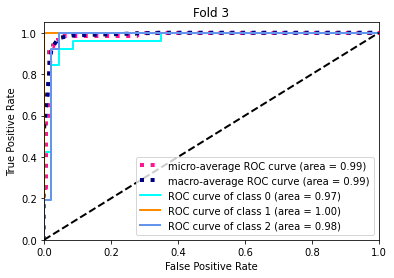

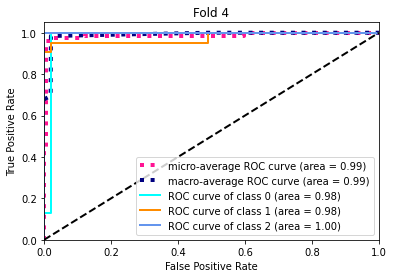

In [37]:
for i in range(len(parameters[0])):
    plot_Kfold(parameters[0][i], parameters[1][i], parameters[2][i], fold=i)

## Adaboost:
---

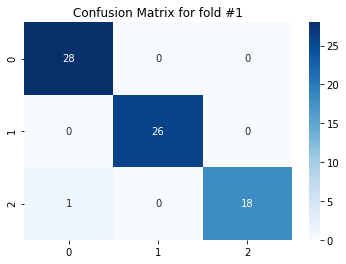

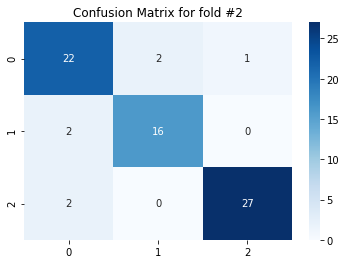

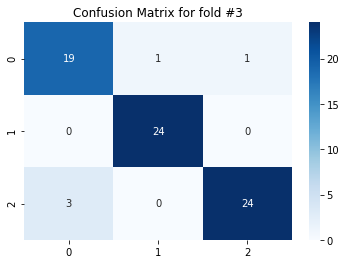

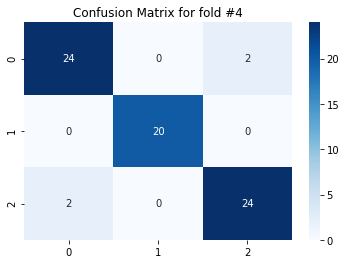

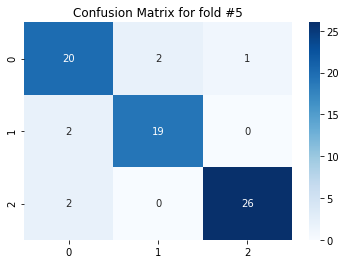

In [38]:
parameters = KfoldProcess(X, y, ADB, 5)

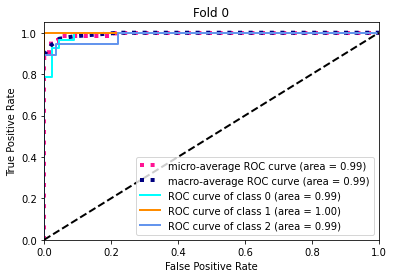

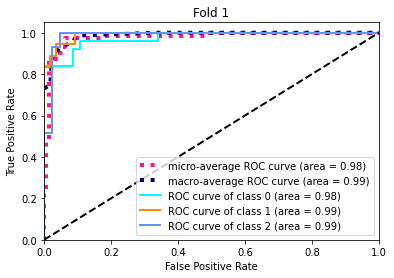

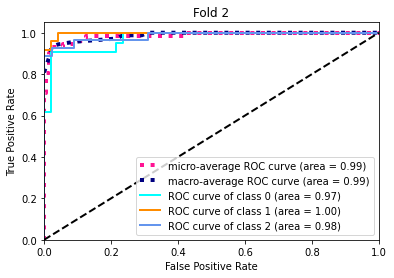

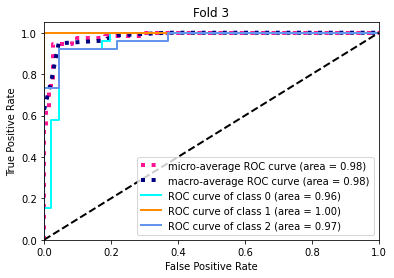

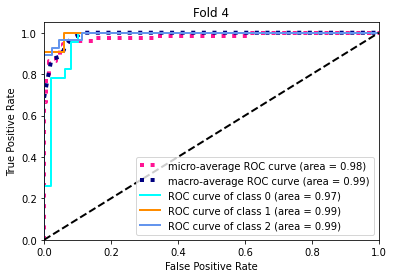

In [39]:
for i in range(len(parameters[0])):
    plot_Kfold(parameters[0][i], parameters[1][i], parameters[2][i], fold=i)

## Random Forest:
---

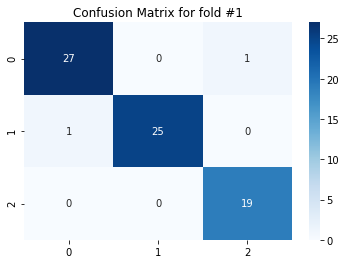

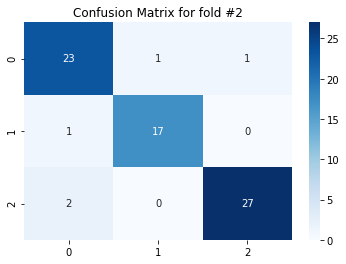

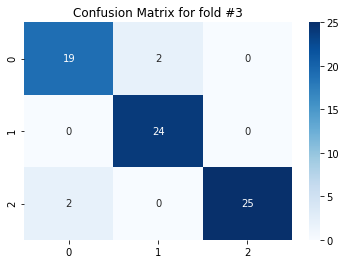

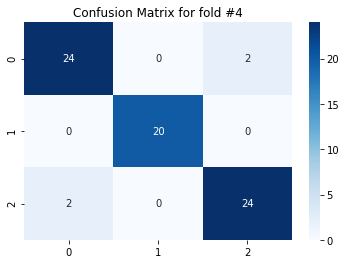

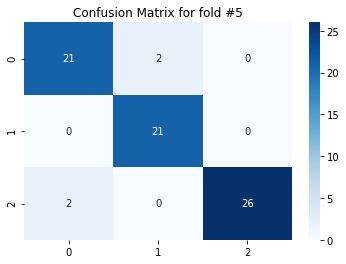

In [40]:
parameters = KfoldProcess(X, y, RFC, 5)

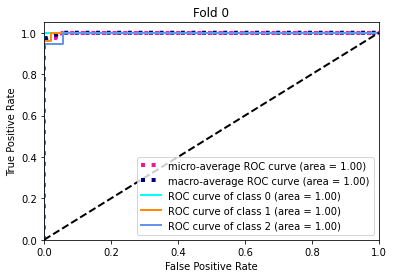

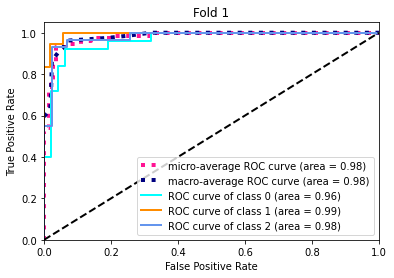

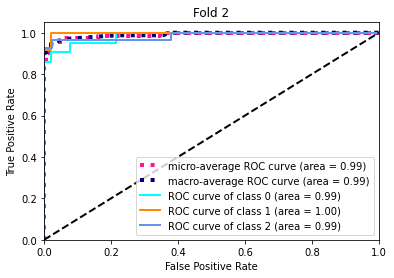

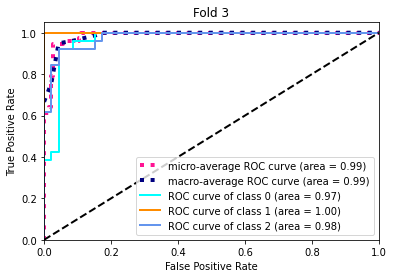

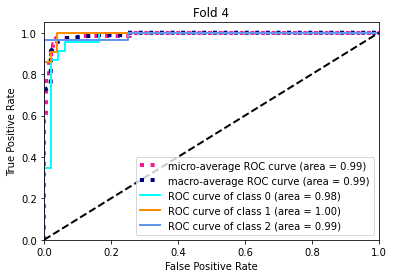

In [41]:
for i in range(len(parameters[0])):
    plot_Kfold(parameters[0][i], parameters[1][i], parameters[2][i], fold=i)

---
## Now, after choosing our model to be SVC, We will train it over the entire train dataset and explore the results on our test data:
---

In [42]:
classifier = OneVsRestClassifier(svc)
trained = classifier.fit(X, y)

In [43]:
test

t0          t1          t2          t3          t4          t5  \
0     9.500000    2.833333    8.166667   16.833333   16.833333    7.166667   
1  -112.000000  -67.666667  -37.666667  -23.666667  -13.333333    0.333333   
2    15.833333  -12.500000  -58.166667  -85.833333  -86.833333  -72.166667   
3  -254.833333 -258.833333 -254.833333 -248.833333 -243.166667 -242.166667   
4    26.000000    3.333333    6.000000   28.666667   52.666667   66.000000   
5    44.166667   63.833333   70.500000   68.166667   63.166667   56.833333   
6    20.666667   18.000000   23.333333   19.333333    6.000000  -15.333333   
7    25.000000   21.666667   16.666667   13.666667   11.333333    6.333333   
8   -43.500000  -59.500000  -56.833333  -42.833333  -28.166667  -25.500000   
9     1.000000    5.000000    6.000000    3.333333    1.000000    4.666667   
10 -163.166667 -143.166667 -122.166667 -115.166667 -122.500000 -131.500000   
11 -640.000000 -636.000000 -629.000000 -624.000000 -621.000000 -622.000000   
12 -319.000000 -312.000000 -310.000000 -315.000000 -323.000000 -329.000000   
13 -630.000000 -624.000000 -614.000000 -606.000000 -603.000000 -607.000000   

            t6          t7          t8          t9         t10         t11  \
0     5.166667   26.500000   57.833333   44.166667  -25.833333  -61.833333   
1    19.000000   46.666667   66.000000    1.333333 -162.333333 -235.666667   
2   -53.500000  -30.500000  -43.500000 -147.833333 -303.166667 -305.833333   
3  -243.500000 -226.166667 -177.500000 -141.166667 -187.500000 -291.500000   
4    72.666667   83.333333  103.333333  112.666667   91.333333   60.666667   
5    47.500000   34.833333   28.833333   36.833333   51.833333   54.833333   
6   -23.333333  -11.333333   11.333333   35.333333   40.666667   34.000000   
7     0.666667   -5.000000   -5.333333   -5.000000   -4.333333   -4.666667   
8   -40.166667  -66.833333  -96.166667 -112.833333 -109.833333  -87.500000   
9    15.000000   29.333333   40.666667   43.666667   37.000000   23.000000   
10 -129.833333 -110.500000  -72.833333  -25.500000   13.166667   31.166667   
11 -628.000000 -633.000000 -634.000000 -630.000000 -625.000000 -625.000000   
12 -332.000000 -331.000000 -332.000000 -333.000000 -335.000000 -335.000000   
13 -614.000000 -620.000000 -620.000000 -617.000000 -615.000000 -618.000000   

           t12         t13         t14          t15          t16  \
0    53.166667  226.833333   65.166667  -886.833333 -2668.500000   
1    48.666667  547.333333  393.000000 -1520.666667 -5433.333333   
2    21.833333  371.166667 -289.833333 -3240.166667 -8863.166667   
3  -273.166667   -6.833333  185.166667  -614.166667 -3440.833333   
4    80.666667  138.000000   42.000000  -559.333333 -1956.666667   
5    36.166667    6.833333  -18.833333   -37.500000   -75.833333   
6    24.666667   22.000000   22.000000    16.666667   -34.000000   
7     1.333333   15.000000   11.333333   -51.666667  -211.333333   
8   -58.166667  -37.166667  -39.500000   -77.166667  -162.833333   
9    17.666667   34.333333   62.666667    36.333333  -139.333333   
10   46.500000   92.833333  143.833333    39.500000  -473.166667   
11 -629.000000 -631.000000 -628.000000  -621.000000  -616.000000   
12 -336.000000 -337.000000 -335.000000  -330.000000  -323.000000   
13 -627.000000 -637.000000 -643.000000  -643.000000  -642.000000   

             t17           t18           t19           t20           t21  \
0   -4684.500000  -6062.500000  -6316.166667  -5646.166667  -4663.166667   
1  -10082.666670 -13414.666670 -14096.666670 -12349.333330  -9452.333333   
2  -15826.833330 -21546.833330 -23778.166670 -22122.166670 -18178.500000   
3   -8576.500000 -15042.166670 -21087.833330 -25312.833330 -27432.500000   
4   -4135.333333  -6711.333333  -9123.333333 -10944.666670 -12032.666670   
5    -163.166667   -306.833333   -482.166667   -654.500000   -800.833333   
6    -170.000000   -439.333333   -863.333333  -1410.000000  -2008.666667   
7    -464.000000   -759.000000  -1025.666

### Preparing our test data:

In [44]:
data_test = test.iloc[:, :-4]
labels_test = test['label']

for index, row in data_test.iterrows():
    scaler = MinMaxScaler()
    scaler.fit(data_test.iloc[index,:].values.reshape(-1, 1))
    data_test.iloc[index,:] = scaler.transform(data_test.iloc[index,:].values.reshape(-1, 1)).reshape(1,-1)

lab_ = []
for elem in labels_test:
    if elem == '4-Rose':
        lab_.append(0)
    elif elem == '1-Benz':
        lab_.append(1)
    elif elem == '6-Ger':
        lab_.append(2)
    else:
        lab_.append(-1)

In [45]:
lab_

[1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, -1, -1, -1]

In [46]:
labels_test = pd.DataFrame(lab_, columns=['Label']) # [:-3]

y_test = labels_test.Label.values
X_test = data_test.values

In [47]:
y_score = trained.predict_proba(X_test)

In [48]:
np.round(y_score*100, decimals=1)

array([[  0. , 100. ,   0. ],
       [  1.5, 100. ,   0. ],
       [  0. ,  99.7,   0. ],
       [  0.2,  96.8,   0.6],
       [ 62.5,   2.9,  16.1],
       [  1.3,   0. ,  97.6],
       [ 97.9,   6.4,   0.4],
       [  0.6,   0.6, 100. ],
       [  0.1,   0. , 100. ],
       [  0.4,   0.4, 100. ],
       [  0.2,   0. ,  99.1],
       [  1.5,  58.3,  99. ],
       [ 15.7,  76.5,  43.3],
       [ 58.5,  95.2,  44.9]])

In [49]:
trained.predict(X_test)

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [50]:
def pred(data):
    lst = []
    for row in data:
        if sum(row) != 1:
            lst.append(-1)
        else:
            lst.append(int(np.where(row == 1)[0]))
    return np.array(lst)

In [51]:
preds = pred(trained.predict(X_test))

In [52]:
y_test == preds

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [53]:
print(f'Model accuracy on test data is: {round(sum(y_test == preds)/len(y_test)*100, 2)}%')

Model accuracy on test data is: 92.86%


In [54]:
import pickle
with open('svc_model.pkl', 'wb') as h:
    pickle.dump(trained, h)